In [1]:
!pip install phik matplotlib scikit-learn numpy pandas catboost -q

# Feature selection

In [16]:
# Linear Correlation - фильтрация по степени корреляции с целевой переменной.
# Phik Correlation - фильтрация по степени Phik корреляции с целевой переменной.
# Feature Importance - считаем важность при помощи встроенных методов feature_importance у решающих деревьев. 
# Permutation Importance - считаем важность через перемешивания и отсеиваем признаки снизу. 
# Shap Values - считаем важность при помощи shap

In [3]:
import phik
from phik.report import plot_correlation_matrix
from phik import report
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [6]:
df = pd.read_csv('https://stepik.org/media/attachments/lesson/779915/fs_task1_10f.csv')
df

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,target
0,2015,163.000000,-1.450726,0.5,332,-0.018070,170,-9,0.10,50.339080,engine_ignition
1,2014,108.451384,2.233679,0.4,425,-0.849765,173,16,0.10,44.367816,break_bug
2,2010,167.738026,-8.024895,-0.8,50,0.134024,171,-9,0.10,44.902299,engine_check
3,2018,167.000000,-0.201363,2.0,224,-0.985060,173,-2,0.52,44.770115,engine_check
4,2019,183.000000,14.666233,0.8,351,0.606498,170,13,0.10,45.241379,another_bug
...,...,...,...,...,...,...,...,...,...,...,...
1865,2014,114.849701,-8.475321,-0.3,339,-1.062402,170,9,0.10,44.419540,gear_stick
1866,2011,152.198802,10.065974,0.2,241,-0.365611,174,-1,0.10,43.488506,engine_check
1867,2014,118.000000,9.569632,0.5,450,0.290211,171,-3,0.10,44.477011,wheel_shake
1868,2012,188.521004,14.327537,-0.7,392,1.218379,174,1,0.00,48.706897,electro_bug


## Correlation

interval columns not set, guessing: ['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9']


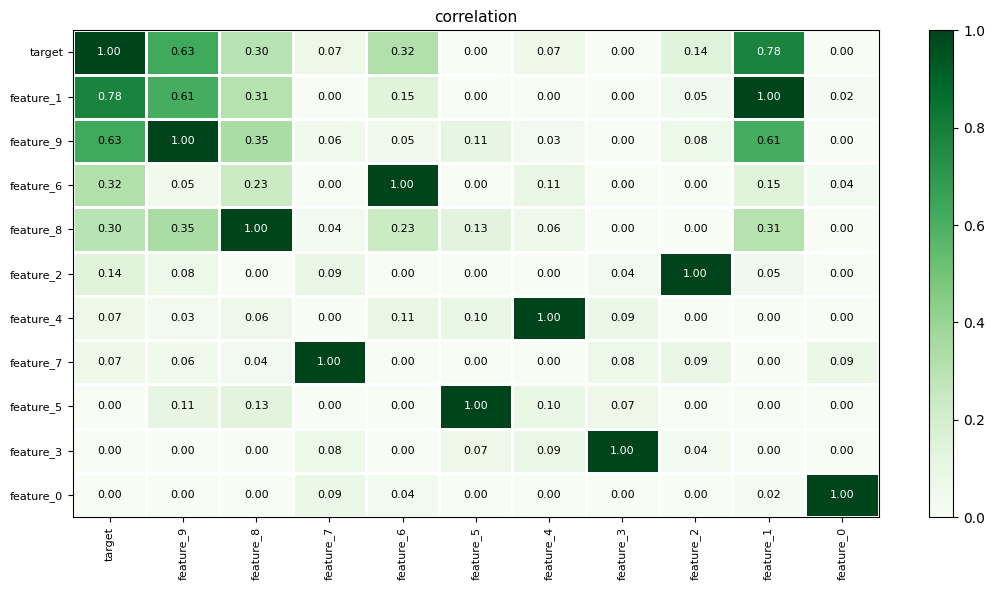

In [7]:
phik_overview = df.phik_matrix().sort_values('target')

plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map="Greens", 
                        fontsize_factor=0.8, figsize=(11, 6))
plt.tight_layout()

interval columns not set, guessing: ['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9']


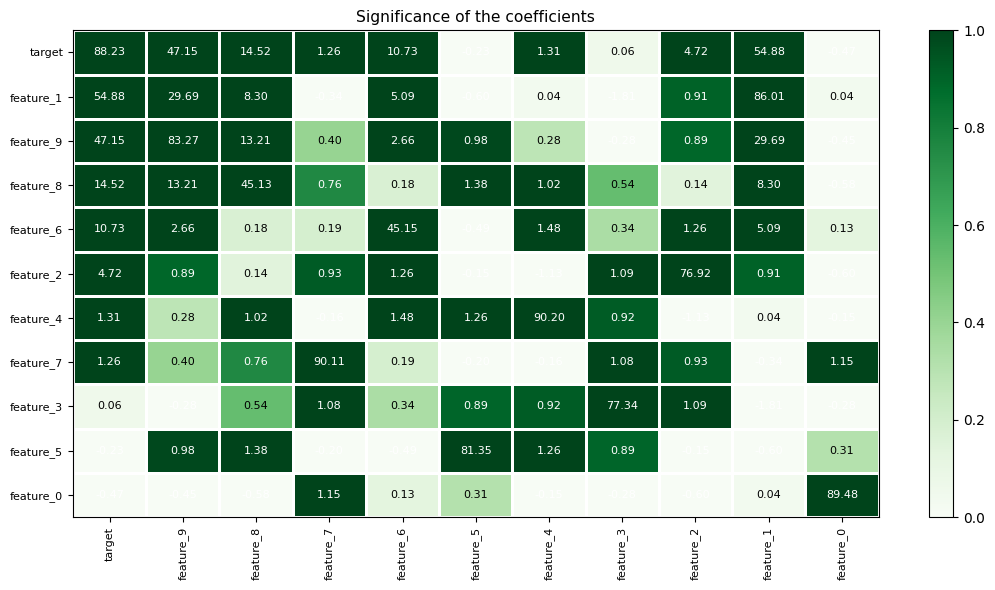

In [8]:
significance_overview = df.significance_matrix().sort_values('target')

plot_correlation_matrix(significance_overview.values, 
                        x_labels=significance_overview.columns, 
                        y_labels=significance_overview.index, 
                        vmin=0, vmax=1, color_map="Greens",
                        title="Significance of the coefficients", 
                        usetex=False, fontsize_factor=0.8, figsize=(11, 6))
plt.tight_layout()

## Feature importance

In [9]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split

In [10]:
model = CatBoostClassifier()

In [11]:
X = df.drop(['target'], axis=1)
y = df.target

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)

In [ ]:
model.fit(X_train, y_train)

In [15]:
model.get_feature_importance(prettified=True)

,Feature Id,Importances
0,feature_1,29.683644
1,feature_9,24.409371
2,feature_8,10.603017
3,feature_2,5.867246
4,feature_4,5.643302
5,feature_7,5.295974
6,feature_3,5.035880
7,feature_5,4.958118
8,feature_6,4.657102
9,feature_0,3.846346
